In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import os

In [ ]:
folder_path = '/content/drive/My Drive/United Airlines'
#folder_path = '/content/drive/My Drive/SkyHack'

In [ ]:
f1 = os.path.join(folder_path, 'callsf0d4f5a.csv')
f2 = os.path.join(folder_path, 'customers2afd6ea.csv')
f3 = os.path.join(folder_path, 'reason18315ff.csv')
f4 = os.path.join(folder_path, 'sentiment_statisticscc1e57a.csv')
f5 = os.path.join(folder_path, 'testbc7185d.csv')
try:
  call_df = pd.read_csv(f1)
  customer_df = pd.read_csv(f2)
  reason_df = pd.read_csv(f3)
  sentiment_df = pd.read_csv(f4)
  test_df = pd.read_csv(f5)
except FileNotFoundError:
  print(f"File not found")

In [ ]:
# f1 = os.path.join(folder_path, 'callsData.csv')
# f2 = os.path.join(folder_path, 'customers.csv')
# f3 = os.path.join(folder_path, 'reason18315ff (1).csv')
# f4 = os.path.join(folder_path, 'sentiment_statisticscc1e57a.csv')
# f5 = os.path.join(folder_path, 'testbc7185d (1).csv')
# try:
#   call_df = pd.read_csv(f1)
#   customer_df = pd.read_csv(f2)
#   reason_df = pd.read_csv(f3)
#   sentiment_df = pd.read_csv(f4)
#   test_df = pd.read_csv(f5)
# except FileNotFoundError:
#   print(f"File not found")


In [ ]:
# Convert datetime columns to pandas datetime
call_df['call_start_datetime'] = pd.to_datetime(call_df['call_start_datetime'])
call_df['agent_assigned_datetime'] = pd.to_datetime(call_df['agent_assigned_datetime'])
call_df['call_end_datetime'] = pd.to_datetime(call_df['call_end_datetime'])

# Calculate AHT (Average Handle Time) and AST (Average Speed to Answer)
call_df['AHT'] = (call_df['call_end_datetime'] - call_df['call_start_datetime']).dt.total_seconds()
call_df['AST'] = (call_df['agent_assigned_datetime'] - call_df['call_start_datetime']).dt.total_seconds()

# Preview the newly added columns
print(call_df[['call_id', 'AHT', 'AST']].head())

      call_id     AHT    AST
0  4667960400  2280.0  420.0
1  1122072124   900.0  180.0
2  6834291559  1620.0  480.0
3  2266439882   720.0  300.0
4  1211603231  1140.0  600.0


In [ ]:
print(call_df.head())

      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118 2024-07-31 23:56:00   
1  1122072124   8186702651    519057 2024-08-01 00:03:00   
2  6834291559   2416856629    158319 2024-07-31 23:59:00   
3  2266439882   1154544516    488324 2024-08-01 00:05:00   
4  1211603231   5214456437    721730 2024-08-01 00:04:00   

  agent_assigned_datetime   call_end_datetime  \
0     2024-08-01 00:03:00 2024-08-01 00:34:00   
1     2024-08-01 00:06:00 2024-08-01 00:18:00   
2     2024-08-01 00:07:00 2024-08-01 00:26:00   
3     2024-08-01 00:10:00 2024-08-01 00:17:00   
4     2024-08-01 00:14:00 2024-08-01 00:23:00   

                                     call_transcript     AHT    AST  
0  \n\nAgent: Thank you for calling United Airlin...  2280.0  420.0  
1  \n\nAgent: Thank you for calling United Airlin...   900.0  180.0  
2  \n\nAgent: Thank you for calling United Airlin...  1620.0  480.0  
3  \n\nAgent: Thank you for calling United Airlin...   720.0  30

In [ ]:


import pandas as pd
merged_df = pd.merge(call_df, sentiment_df, on='call_id', how='left')
print(merged_df.head())


      call_id  customer_id  agent_id_x call_start_datetime  \
0  4667960400   2033123310      963118 2024-07-31 23:56:00   
1  1122072124   8186702651      519057 2024-08-01 00:03:00   
2  6834291559   2416856629      158319 2024-07-31 23:59:00   
3  2266439882   1154544516      488324 2024-08-01 00:05:00   
4  1211603231   5214456437      721730 2024-08-01 00:04:00   

  agent_assigned_datetime   call_end_datetime  \
0     2024-08-01 00:03:00 2024-08-01 00:34:00   
1     2024-08-01 00:06:00 2024-08-01 00:18:00   
2     2024-08-01 00:07:00 2024-08-01 00:26:00   
3     2024-08-01 00:10:00 2024-08-01 00:17:00   
4     2024-08-01 00:14:00 2024-08-01 00:23:00   

                                     call_transcript     AHT    AST  \
0  \n\nAgent: Thank you for calling United Airlin...  2280.0  420.0   
1  \n\nAgent: Thank you for calling United Airlin...   900.0  180.0   
2  \n\nAgent: Thank you for calling United Airlin...  1620.0  480.0   
3  \n\nAgent: Thank you for calling United Airli

#Analysing agent tone effect on AHT and AST

In [ ]:
agent_tone_performance = merged_df.groupby('agent_tone')[['AHT', 'AST']].mean()
agent_tone_performance

,AHT,AST
agent_tone,,
angry,819.485861,425.089974
calm,1070.027964,443.528267
frustrated,1041.465798,424.397394
neutral,1184.720052,434.443613
polite,681.379310,461.379310


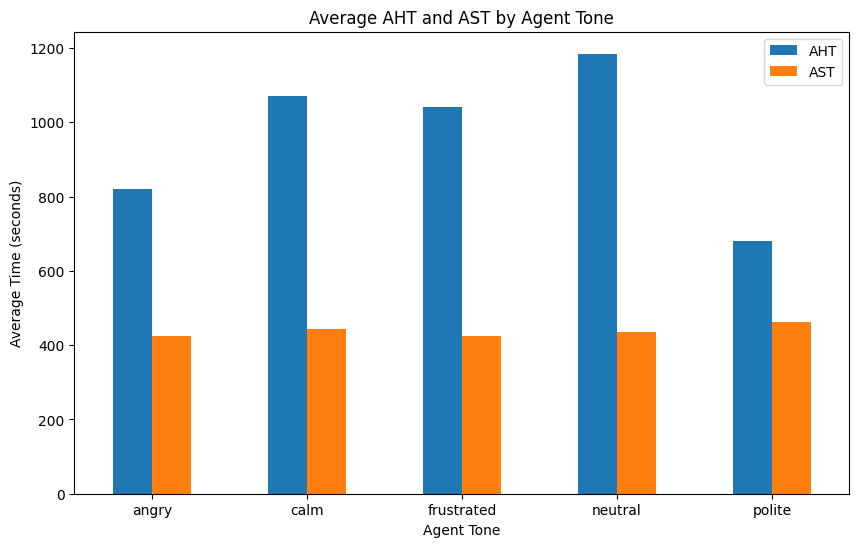

In [ ]:

import matplotlib.pyplot as plt

# Plotting AHT and AST by agent tone
agent_tone_performance.plot(kind='bar', figsize=(10, 6))
plt.title('Average AHT and AST by Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Average Time (seconds)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(['AHT', 'AST'])
plt.show()


#Average sentiment affect on AHT and AST

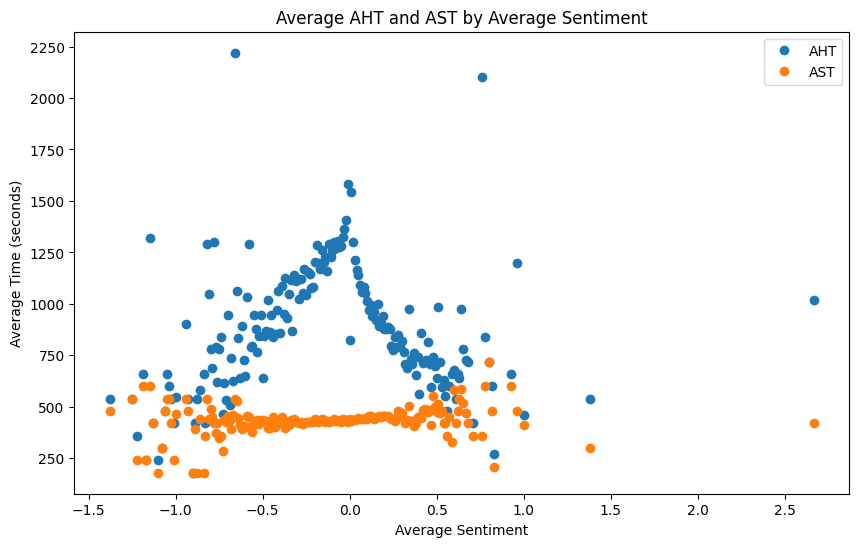

In [ ]:

import matplotlib.pyplot as plt
# Group by average sentiment and calculate the average AHT and AST
sentiment_performance = merged_df.groupby('average_sentiment')[['AHT', 'AST']].mean()

# Plotting AHT and AST by average sentiment as points
plt.figure(figsize=(10, 6))
plt.plot(sentiment_performance.index, sentiment_performance['AHT'], 'o', label='AHT')
plt.plot(sentiment_performance.index, sentiment_performance['AST'], 'o', label='AST')
plt.title('Average AHT and AST by Average Sentiment')
plt.xlabel('Average Sentiment')
plt.ylabel('Average Time (seconds)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()


In [ ]:

import pandas as pd
merged_df = pd.merge(call_df, sentiment_df, on='call_id', how='left')

# Print the first few rows of the merged DataFrame to verify the merge.
print(merged_df.head())


      call_id  customer_id  agent_id_x call_start_datetime  \
0  4667960400   2033123310      963118 2024-07-31 23:56:00   
1  1122072124   8186702651      519057 2024-08-01 00:03:00   
2  6834291559   2416856629      158319 2024-07-31 23:59:00   
3  2266439882   1154544516      488324 2024-08-01 00:05:00   
4  1211603231   5214456437      721730 2024-08-01 00:04:00   

  agent_assigned_datetime   call_end_datetime  \
0     2024-08-01 00:03:00 2024-08-01 00:34:00   
1     2024-08-01 00:06:00 2024-08-01 00:18:00   
2     2024-08-01 00:07:00 2024-08-01 00:26:00   
3     2024-08-01 00:10:00 2024-08-01 00:17:00   
4     2024-08-01 00:14:00 2024-08-01 00:23:00   

                                     call_transcript     AHT    AST  \
0  \n\nAgent: Thank you for calling United Airlin...  2280.0  420.0   
1  \n\nAgent: Thank you for calling United Airlin...   900.0  180.0   
2  \n\nAgent: Thank you for calling United Airlin...  1620.0  480.0   
3  \n\nAgent: Thank you for calling United Airli

#Average sentiment vs call Reason

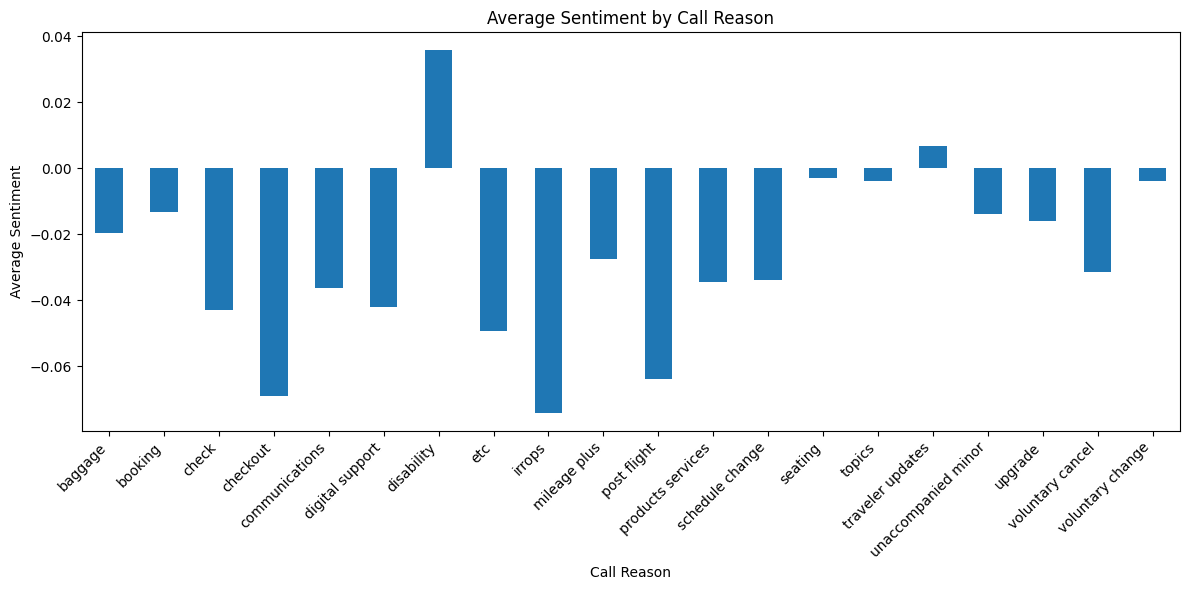

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge call_df and reason_df on call_id
merged_df_reason = pd.merge(call_df, reason_df, on='call_id', how='left')

# Merge the result with sentiment_df on call_id
merged_df_reason_sentiment = pd.merge(merged_df_reason, sentiment_df, on='call_id', how='left')


# Group by call reason and calculate the average sentiment
reason_sentiment = merged_df_reason_sentiment.groupby('primary_call_reason')['average_sentiment'].mean()

# Create a bar chart with color
plt.figure(figsize=(12, 6))
reason_sentiment.plot(kind='bar', )
plt.title('Average Sentiment by Call Reason')
plt.xlabel('Call Reason')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


#Analysing frequent word in call transcripts

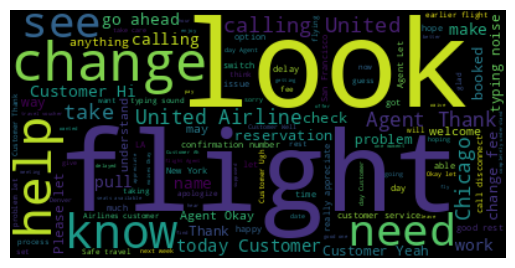

In [ ]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'call_transcript' is the column name containing call transcripts
text = " ".join(review for review in call_df.call_transcript.astype(str))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


#Distribution of AHT and AST(Violin Plot)

---



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


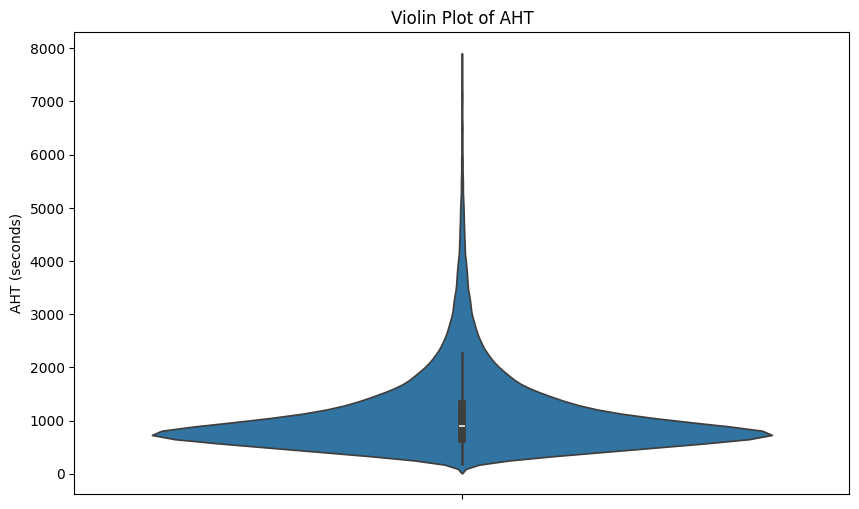

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


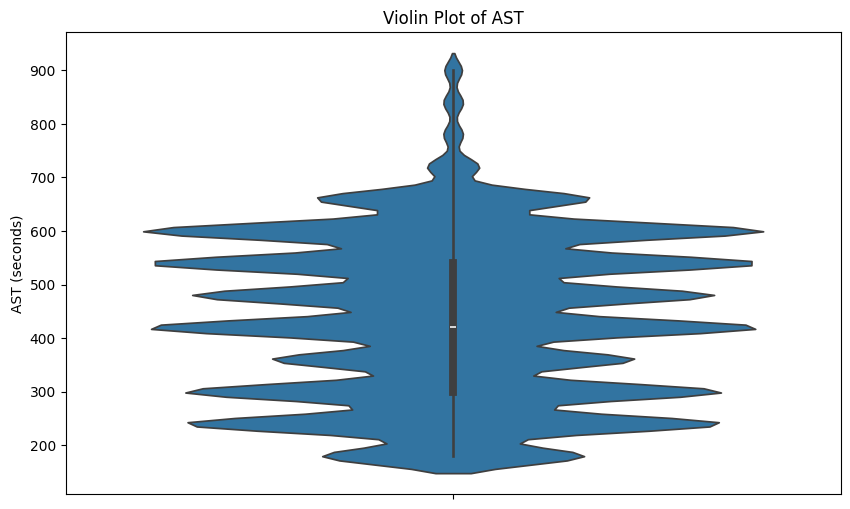

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Create a violin plot for AHT and AST
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Violin plot for AHT
sns.violinplot(y=call_df['AHT'])
plt.title('Violin Plot of AHT')
plt.ylabel('AHT (seconds)')
plt.show()

plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Violin plot for AST
sns.violinplot(y=call_df['AST'])
plt.title('Violin Plot of AST')
plt.ylabel('AST (seconds)')
plt.show()

In [ ]:
call_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,AST
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,2280.0,420.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,900.0,180.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1620.0,480.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,720.0,300.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,600.0


#Finding peak hour of calls

In [ ]:
import pandas as pd


call_df['call_start_datetime'] = pd.to_datetime(call_df['call_start_datetime'])

# Extract the hour from the 'call_start_datetime'
call_df['call_hour'] = call_df['call_start_datetime'].dt.hour
print(call_df.head())
# Group by call hour and count the number of calls
calls_per_hour = call_df.groupby('call_hour')['call_id'].count()

# Find the hour with the maximum calls
peak_hour = calls_per_hour.idxmax()

print(f"The peak time with the maximum calls is: {peak_hour}:00 - {peak_hour + 1}:00")

      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118 2024-07-31 23:56:00   
1  1122072124   8186702651    519057 2024-08-01 00:03:00   
2  6834291559   2416856629    158319 2024-07-31 23:59:00   
3  2266439882   1154544516    488324 2024-08-01 00:05:00   
4  1211603231   5214456437    721730 2024-08-01 00:04:00   

  agent_assigned_datetime   call_end_datetime  \
0     2024-08-01 00:03:00 2024-08-01 00:34:00   
1     2024-08-01 00:06:00 2024-08-01 00:18:00   
2     2024-08-01 00:07:00 2024-08-01 00:26:00   
3     2024-08-01 00:10:00 2024-08-01 00:17:00   
4     2024-08-01 00:14:00 2024-08-01 00:23:00   

                                     call_transcript     AHT    AST  call_hour  
0  \n\nAgent: Thank you for calling United Airlin...  2280.0  420.0         23  
1  \n\nAgent: Thank you for calling United Airlin...   900.0  180.0          0  
2  \n\nAgent: Thank you for calling United Airlin...  1620.0  480.0         23  
3  \n\nAgent: Thank 

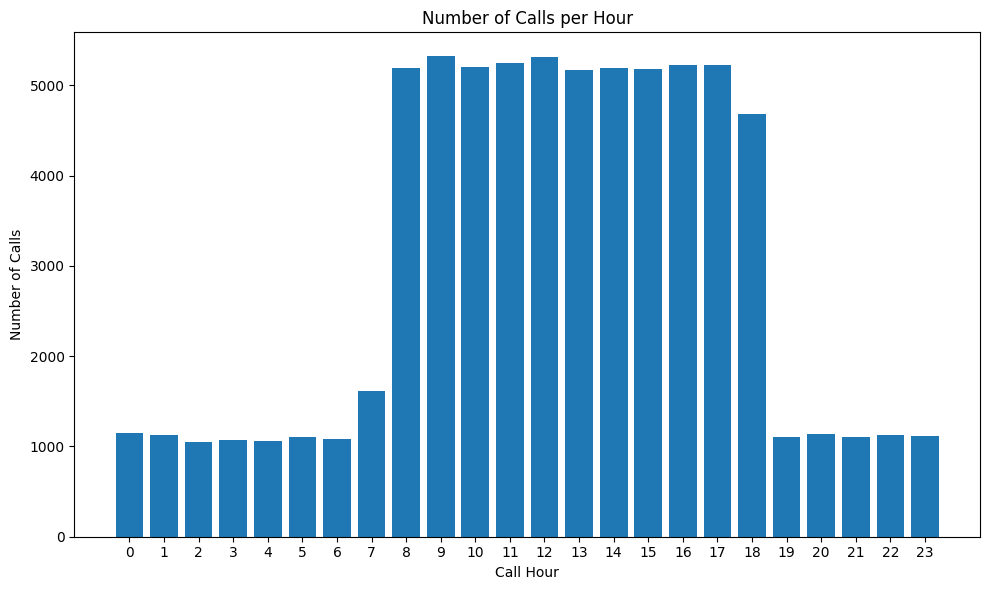

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(calls_per_hour.index, calls_per_hour.values)
plt.title('Number of Calls per Hour')
plt.xlabel('Call Hour')
plt.ylabel('Number of Calls')
plt.xticks(calls_per_hour.index)  # Show all call hours on x-axis
plt.tight_layout()
plt.show()

#AHT during peak hours

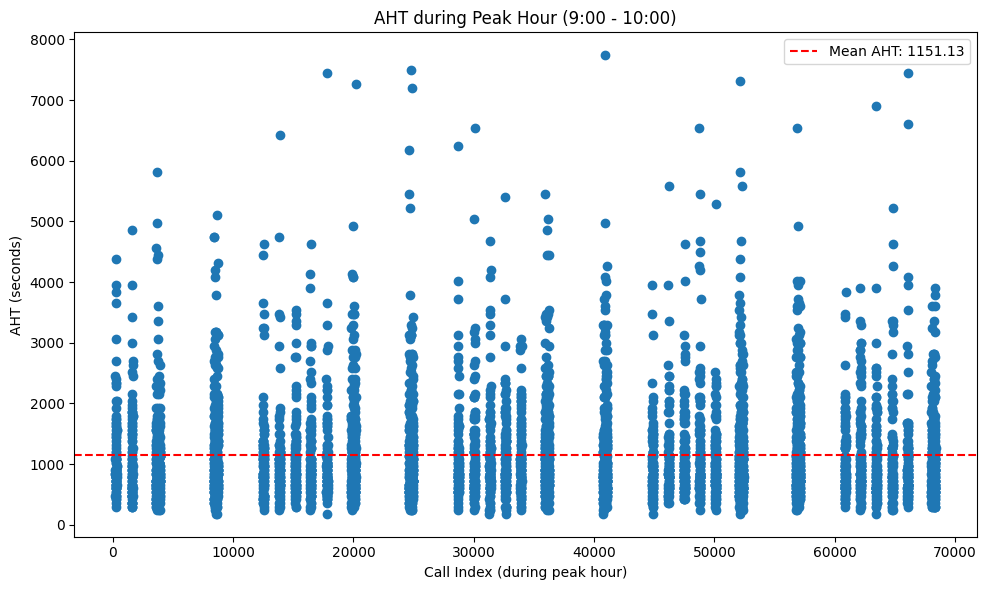

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Filter data for peak hours
peak_hours_data = call_df[call_df['call_hour'] == peak_hour]

# Calculate mean AHT during peak hours
mean_aht_peak_hours = peak_hours_data['AHT'].mean()

# Create a scatter plot for AHT during peak hours
plt.figure(figsize=(10, 6))
plt.scatter(peak_hours_data.index, peak_hours_data['AHT'])
plt.title(f'AHT during Peak Hour ({peak_hour}:00 - {(peak_hour + 1) % 24}:00)')
plt.xlabel('Call Index (during peak hour)')
plt.ylabel('AHT (seconds)')

# Add a horizontal line for the mean AHT
plt.axhline(y=mean_aht_peak_hours, color='red', linestyle='--', label=f'Mean AHT: {mean_aht_peak_hours:.2f}')

plt.legend()  # Show the legend for the mean line
plt.tight_layout()
plt.show()

#Saturday receives most calls

In [ ]:
import pandas as pd

# Assuming your DataFrame is called 'call_df'
# Convert 'call_start_datetime' to datetime objects
call_df['call_start_datetime'] = pd.to_datetime(call_df['call_start_datetime'])

# Extract the day of the week (0 = Monday, 6 = Sunday)
call_df['day_of_week'] = call_df['call_start_datetime'].dt.dayofweek

# Group by day of the week and count calls
calls_per_day = call_df.groupby('day_of_week')['call_id'].count()  # Assuming 'call_id' is a unique identifier for calls

# Get the day of the week with the most calls
busiest_day_index = calls_per_day.idxmax()

# Map day index to day name
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
busiest_day_name = day_names[busiest_day_index]

print(f"The day of the week with the most calls is: {busiest_day_name}")

The day of the week with the most calls is: Saturday


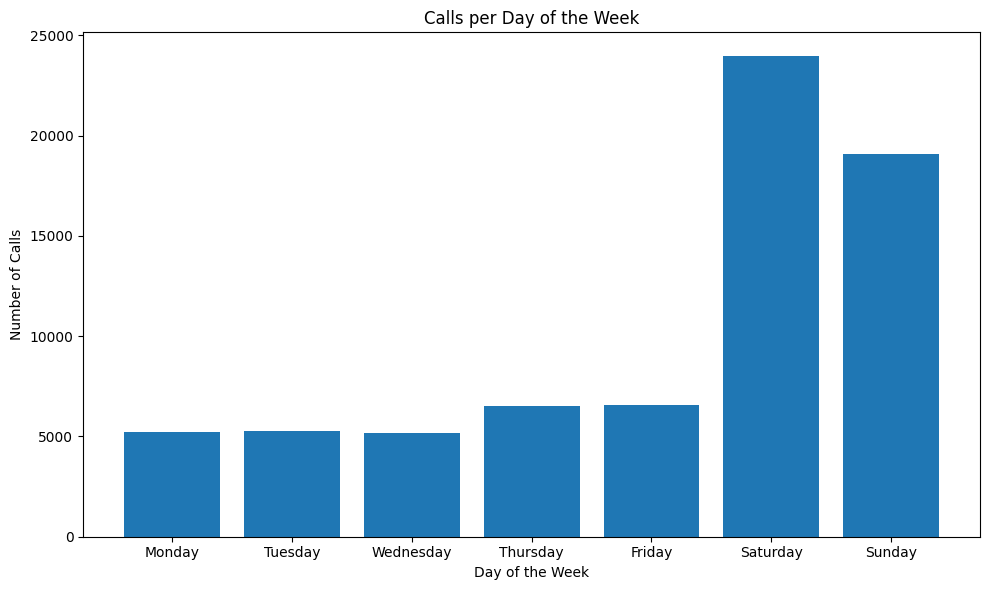

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already created call_df and calls_per_day as in the previous response

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(calls_per_day.index, calls_per_day.values)

# Set x-axis labels to day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(calls_per_day.index, day_names)

plt.title('Calls per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')
plt.tight_layout()
plt.show()

#Unique call Reasons

In [ ]:
unique_reason = reason_df['primary_call_reason'].unique()
print("Unique call reasons:")
for reason in unique_reason:
  print(reason)

Unique call reasons:
Voluntary  Cancel
Booking
IRROPS
Upgrade
Seating
Mileage   Plus
Checkout
Voluntary   Change
Post Flight
Check In
Other  Topics
Communications
Schedule Change
Products & Services
IRROPS  
Digital   Support
Seating  
Disability
Unaccompanied Minor
 Baggage
Traveler  Updates
Communications  
ETC
Upgrade  
Unaccompanied Minor  
Voluntary Change
Voluntary Change  
Checkout  
Mileage Plus
Mileage Plus  
Booking  
Baggage  
Post-Flight
Post-Flight  
Schedule Change  
Baggage
Traveler Updates
Voluntary Cancel
Check-In
Products and Services
Check-In  
Other Topics
Other Topics  
ETC  
Disability  
Digital Support
Digital Support  
Voluntary Cancel  
Products and Services  
Traveler Updates  
Traveler   Updates
Digital  Support
Mileage  Plus
Voluntary  Change


##Applying NLP on primary_call_reason

###Remove punctuation and add space in place of punctuation

In [ ]:
# Remove punctuation and add space in place of punctuation
reason_df['primary_call_reason'] = reason_df['primary_call_reason'].str.replace('[^\w\s]', ' ', regex=True)

###Remove leading and trailing spaces

In [ ]:
# Remove leading and trailing spaces
reason_df['primary_call_reason'] = reason_df['primary_call_reason'].str.strip()

###Remove more than one space between words

In [ ]:
# Remove more than one space between two words
reason_df['primary_call_reason'] = reason_df['primary_call_reason'].str.replace('\s+', ' ', regex=True)

###Convert all the letters to lowercase

In [ ]:
# Convert to lower case

reason_df['primary_call_reason'] = reason_df['primary_call_reason'].str.lower()

###Remove stopwords

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords_and_conjunctions(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

reason_df['primary_call_reason'] = reason_df['primary_call_reason'].apply(remove_stopwords_and_conjunctions)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


###Final unique reasons after NLP

In [ ]:
unique_reason = reason_df['primary_call_reason'].unique()
print("Unique call reasons:")
for reason in unique_reason:
  print(reason)

Unique call reasons:
voluntary cancel
booking
irrops
upgrade
seating
mileage plus
checkout
voluntary change
post flight
check
topics
communications
schedule change
products services
digital support
disability
unaccompanied minor
baggage
traveler updates
etc


In [ ]:
reason_counts = reason_df['primary_call_reason'].value_counts()

In [ ]:
print("Count of unique reasons:")
print(reason_counts)

Count of unique reasons:
primary_call_reason
irrops                 13311
voluntary change       10848
seating                 6365
mileage plus            5851
post flight             4330
communications          3840
products services       3332
baggage                 2832
upgrade                 2738
booking                 2637
check                   1904
checkout                1888
voluntary cancel        1607
digital support         1225
etc                      952
traveler updates         937
topics                   818
schedule change          731
disability               403
unaccompanied minor      104
Name: count, dtype: int64


In [ ]:

total_count = reason_counts.sum()

print("\nTotal count of all reasons:", total_count)


Total count of all reasons: 66653


In [ ]:
import pandas as pd
merged_df = pd.merge(call_df, reason_df, on='call_id', how='inner')
print(merged_df.head())


      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118 2024-07-31 23:56:00   
1  1122072124   8186702651    519057 2024-08-01 00:03:00   
2  6834291559   2416856629    158319 2024-07-31 23:59:00   
3  2266439882   1154544516    488324 2024-08-01 00:05:00   
4  1211603231   5214456437    721730 2024-08-01 00:04:00   

  agent_assigned_datetime   call_end_datetime  \
0     2024-08-01 00:03:00 2024-08-01 00:34:00   
1     2024-08-01 00:06:00 2024-08-01 00:18:00   
2     2024-08-01 00:07:00 2024-08-01 00:26:00   
3     2024-08-01 00:10:00 2024-08-01 00:17:00   
4     2024-08-01 00:14:00 2024-08-01 00:23:00   

                                     call_transcript     AHT    AST  \
0  \n\nAgent: Thank you for calling United Airlin...  2280.0  420.0   
1  \n\nAgent: Thank you for calling United Airlin...   900.0  180.0   
2  \n\nAgent: Thank you for calling United Airlin...  1620.0  480.0   
3  \n\nAgent: Thank you for calling United Airlin...   720.0

##Call hour vs Call Reason

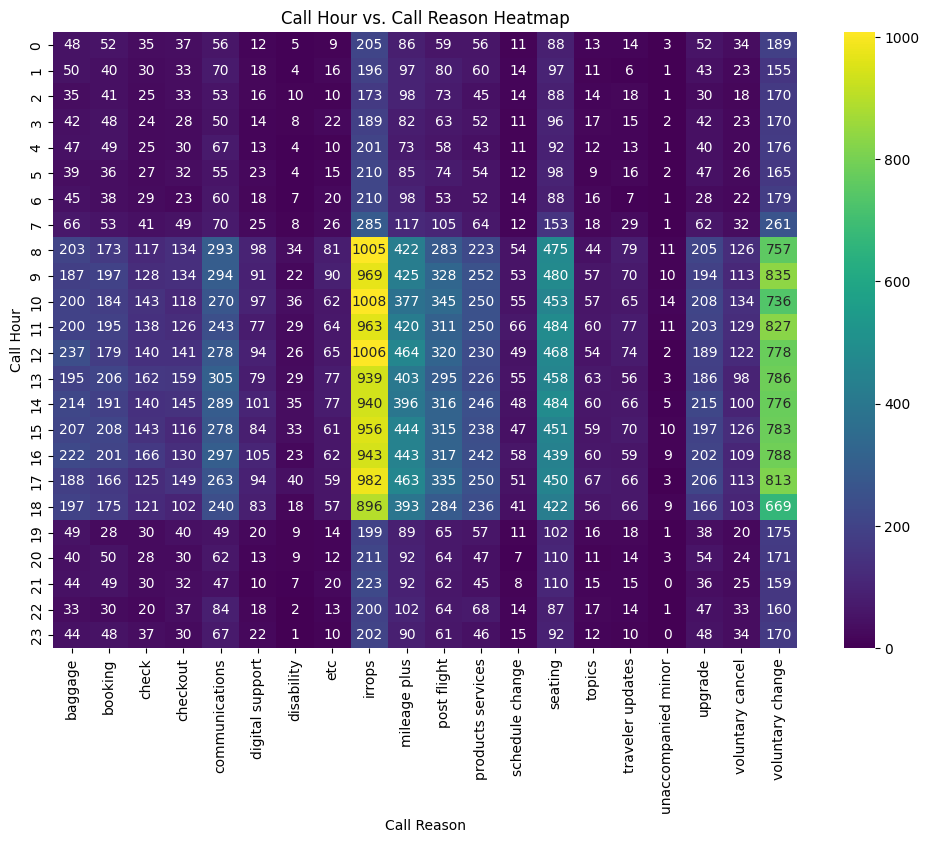

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pivot table to count calls for each hour and reason
pivot_table = pd.pivot_table(merged_df, values='call_id', index='call_hour', columns='primary_call_reason', aggfunc='count')

# Convert the values in the pivot table to integers, handling NaN by filling with 0.
pivot_table = pivot_table.fillna(0).astype(int) # Fill NaN with 0 before converting to int

# Plot the pivot table as a heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis')  # annot=True to show counts, fmt='d' for integer format
plt.title('Call Hour vs. Call Reason Heatmap')
plt.xlabel('Call Reason')
plt.ylabel('Call Hour')
plt.show()

##Frequency of calls of each unique call reason

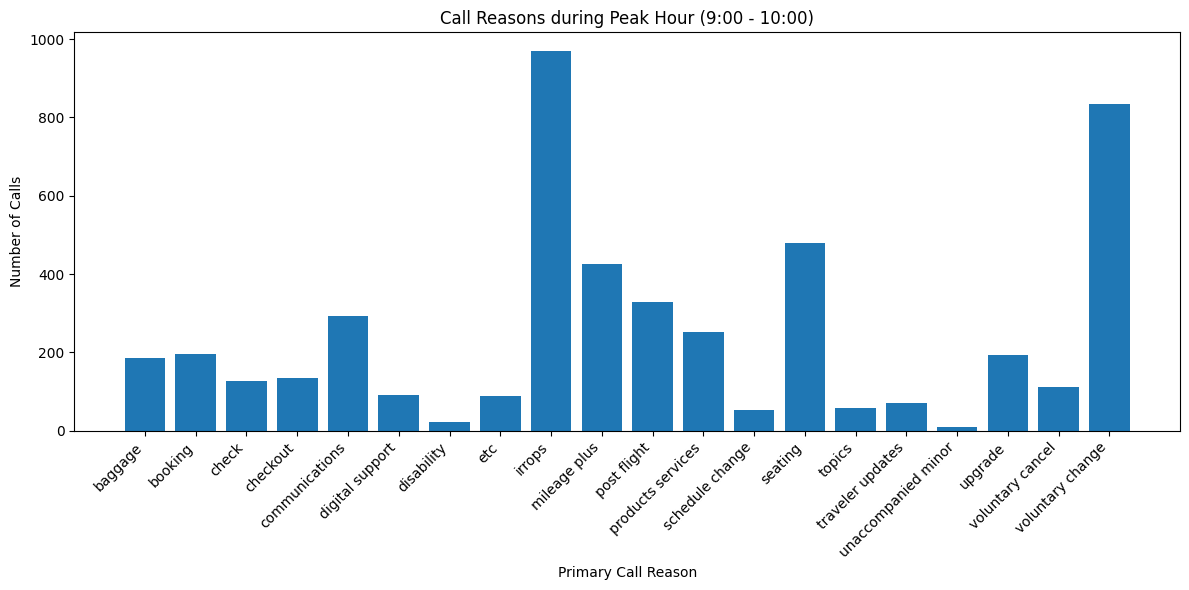

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter data for peak hours
peak_hours_data = merged_df3[merged_df3['call_hour'] == peak_hour]

# Group by primary call reason and count calls during peak hours
reason_counts_peak_hours = peak_hours_data.groupby('primary_call_reason')['call_id'].count()

# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.bar(reason_counts_peak_hours.index, reason_counts_peak_hours.values)
plt.title(f'Call Reasons during Peak Hour ({peak_hour}:00 - {(peak_hour + 1) % 24}:00)')
plt.xlabel('Primary Call Reason')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

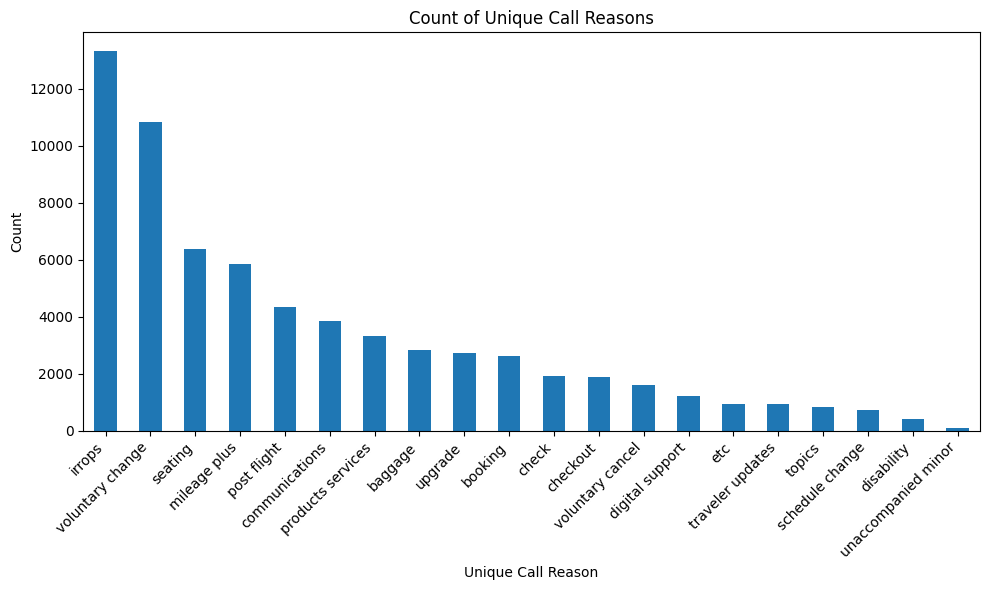

In [ ]:
# Plot the counts
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
reason_counts.plot(kind='bar')
plt.title('Count of Unique Call Reasons')
plt.xlabel('Unique Call Reason')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
merged_df = call_df.merge(reason_df, on='call_id', how='inner')

In [ ]:
merged_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,AST,primary_call_reason
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,2280.0,420.0,voluntary cancel
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,900.0,180.0,booking
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1620.0,480.0,irrops
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,720.0,300.0,upgrade
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,600.0,seating


In [ ]:
merged_df['AHT'].idxmax()

570

In [ ]:
# Get the index label of the row with the maximum AHT
max_aht_index = merged_df['AHT'].idxmax()

# Print the row with the maximum AHT
print(merged_df.loc[[max_aht_index]])

        call_id  customer_id  agent_id call_start_datetime  \
570  4624041541   1241296899    293576 2024-08-01 12:51:00   

    agent_assigned_datetime   call_end_datetime  \
570     2024-08-01 13:01:00 2024-08-01 15:00:00   

                                       call_transcript     AHT    AST  \
570  \n\nAgent: Thank you for calling United Airlin...  7740.0  600.0   

    primary_call_reason  
570         post flight  


In [ ]:
merged_df['AST'].max()

900.0

In [ ]:
reason_aht_ast = merged_df.groupby('primary_call_reason')[['AHT', 'AST']].median()
reason_counts = merged_df['primary_call_reason'].value_counts()

# Sort reasons by count in descending order
sorted_reasons = reason_counts.index.tolist()

# Reorder reason_aht_ast based on sorted reasons
reason_aht_ast = reason_aht_ast.reindex(sorted_reasons)

##Average AHT of calls vs Call reasons

<Figure size 1200x600 with 0 Axes>

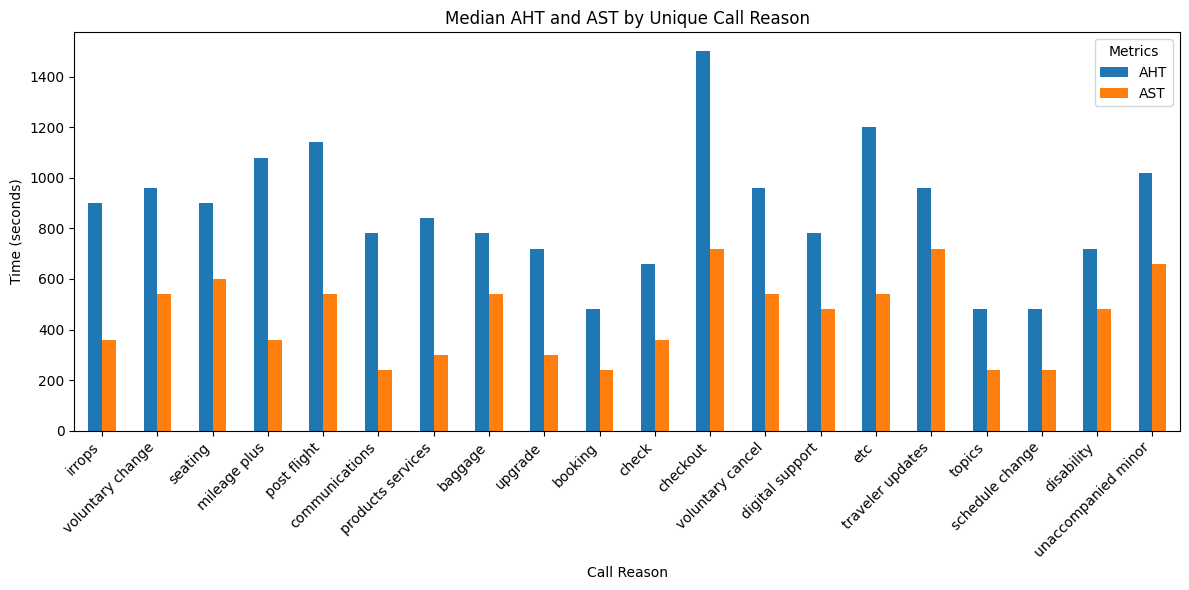

In [ ]:

# Plot the data
plt.figure(figsize=(12, 6))
reason_aht_ast.plot(kind='bar', figsize=(12,6))
plt.title('Median AHT and AST by Unique Call Reason')
plt.xlabel('Call Reason')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.legend(title='Metrics')  # Add a legend for AHT and AST
plt.show()

In [ ]:
reason_aht_ast = merged_df.groupby('primary_call_reason')[['AHT', 'AST']].mean()
reason_counts = merged_df['primary_call_reason'].value_counts()

# Sort reasons by count in descending order
sorted_reasons = reason_counts.index.tolist()

# Reorder reason_aht_ast based on sorted reasons
reason_aht_ast = reason_aht_ast.reindex(sorted_reasons)

<Figure size 1200x600 with 0 Axes>

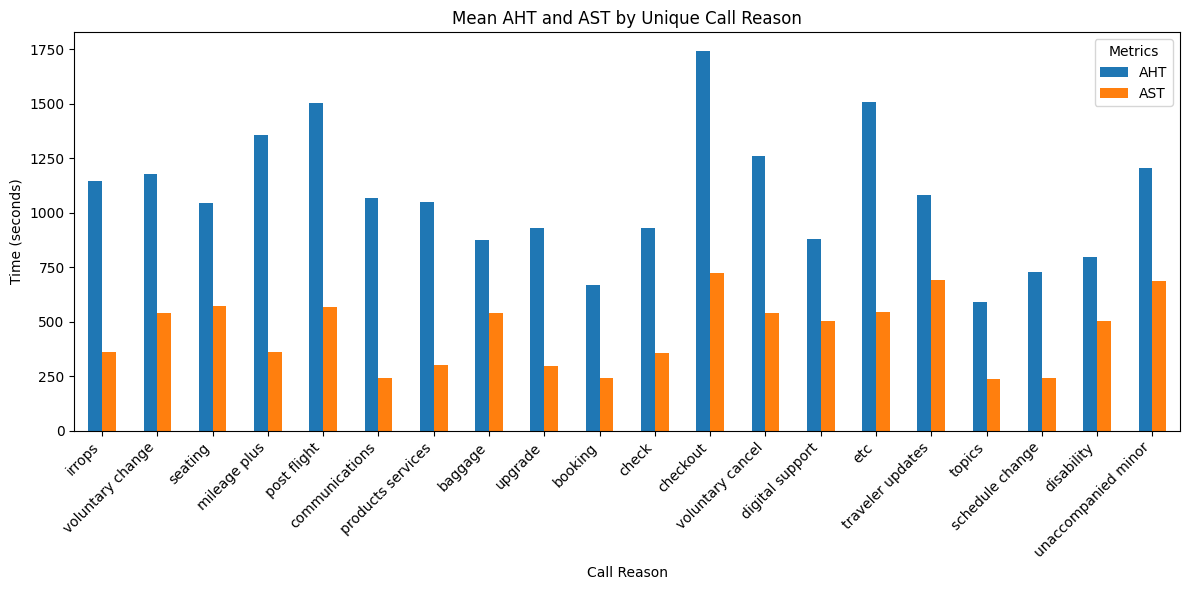

In [ ]:

# Plot the data
plt.figure(figsize=(12, 6))
reason_aht_ast.plot(kind='bar', figsize=(12,6))
plt.title('Mean AHT and AST by Unique Call Reason')
plt.xlabel('Call Reason')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.legend(title='Metrics')  # Add a legend for AHT and AST
plt.show()

#Percentage difference in AHT between most and least frequent call reasons

In [ ]:
import pandas as pd


# Get the most frequent call reason
most_frequent_reason = reason_counts.index[0]

# Get the least frequent call reason
least_frequent_reason = reason_counts.index[-1]

# Get the average AHT for the most and least frequent reasons
aht_most_frequent = reason_aht_ast.loc[most_frequent_reason, 'AHT']
aht_least_frequent = reason_aht_ast.loc[least_frequent_reason, 'AHT']

# Calculate the percentage difference
percentage_difference = ((aht_most_frequent - aht_least_frequent) / aht_least_frequent) * 100

print(f"Percentage difference in AHT between most and least frequent reasons: {percentage_difference:.2f}%")

Percentage difference in AHT between most and least frequent reasons: -5.16%


##Percentage difference in AST between most and least frequent call reasons

In [ ]:
import pandas as pd


# Get the most frequent call reason
most_frequent_reason = reason_counts.index[0]

# Get the least frequent call reason
least_frequent_reason = reason_counts.index[-1]

# Get the average AHT for the most and least frequent reasons
ast_most_frequent = reason_aht_ast.loc[most_frequent_reason, 'AST']
ast_least_frequent = reason_aht_ast.loc[least_frequent_reason, 'AST']

# Calculate the percentage difference
percentage_difference = ((ast_most_frequent - ast_least_frequent) / ast_least_frequent) * 100

print(f"Percentage difference in AST between most and least frequent reasons: {percentage_difference:.2f}%")

Percentage difference in AST between most and least frequent reasons: -47.68%


In [ ]:
reason_stats = merged_df.groupby('primary_call_reason').agg(
    count=('primary_call_reason', 'size'),  # Count of each reason
    aht=('AHT', 'mean'),  # Mean AHT for each reason
    ast=('AST', 'mean')   # Mean AST for each reason
)

# Reset the index to access 'reason' as a column
reason_stats = reason_stats.reset_index()


In [ ]:
reason_stats

,primary_call_reason,count,aht,ast
0,baggage,2832,875.741525,542.097458
1,booking,2637,667.963595,240.227531
2,check,1904,929.968487,355.840336
3,checkout,1888,1741.557203,724.703390
4,communications,3840,1066.687500,239.968750
5,digital support,1225,878.008163,505.714286
6,disability,403,795.632754,503.523573
7,etc,952,1507.184874,544.285714
8,irrops,13311,1145.197205,360.081136
9,mileage plus,5851,1356.588617,361.015211


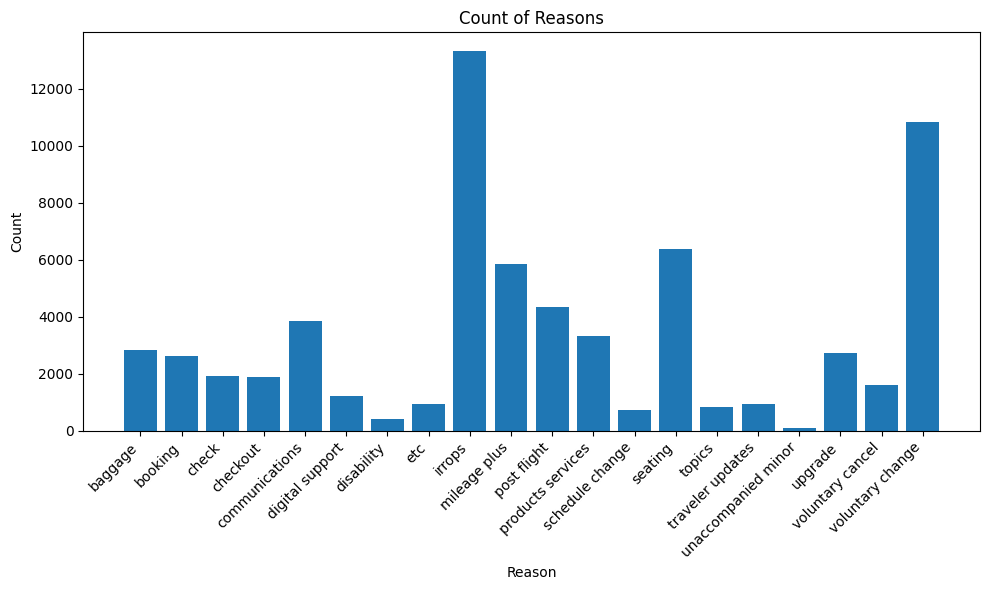

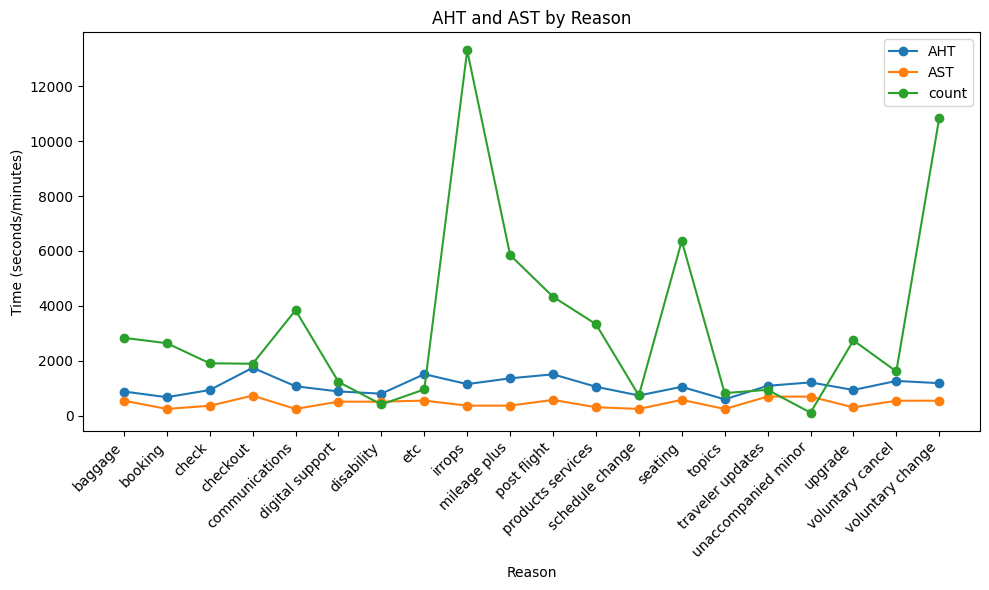

In [ ]:
# Plot the count of reasons
plt.figure(figsize=(10, 6))
plt.bar(reason_stats['primary_call_reason'], reason_stats['count'])
plt.xlabel("Reason")
plt.ylabel("Count")
plt.title("Count of Reasons")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Plot AHT and AST for each reason
plt.figure(figsize=(10, 6))
plt.plot(reason_stats['primary_call_reason'], reason_stats['aht'], marker='o', label='AHT')
plt.plot(reason_stats['primary_call_reason'], reason_stats['ast'], marker='o', label='AST')
plt.plot(reason_stats['primary_call_reason'], reason_stats['count'], marker='o', label='count')
plt.xlabel("Reason")
plt.ylabel("Time (seconds/minutes)")  # Adjust units as needed
plt.title("AHT and AST by Reason")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
merged_df2 = call_df.merge(customer_df, on='customer_id', how='inner')

In [ ]:
merged_df2.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,AST,customer_name,elite_level_code
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,2280.0,420.0,Matthew Foster,4.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,900.0,180.0,Tammy Walters,NaN
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1620.0,480.0,Jeffery Dixon,NaN
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,720.0,300.0,David Wilkins,2.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,600.0,Elizabeth Daniels,0.0


#AHT and AST vs customer_elite_level_Code

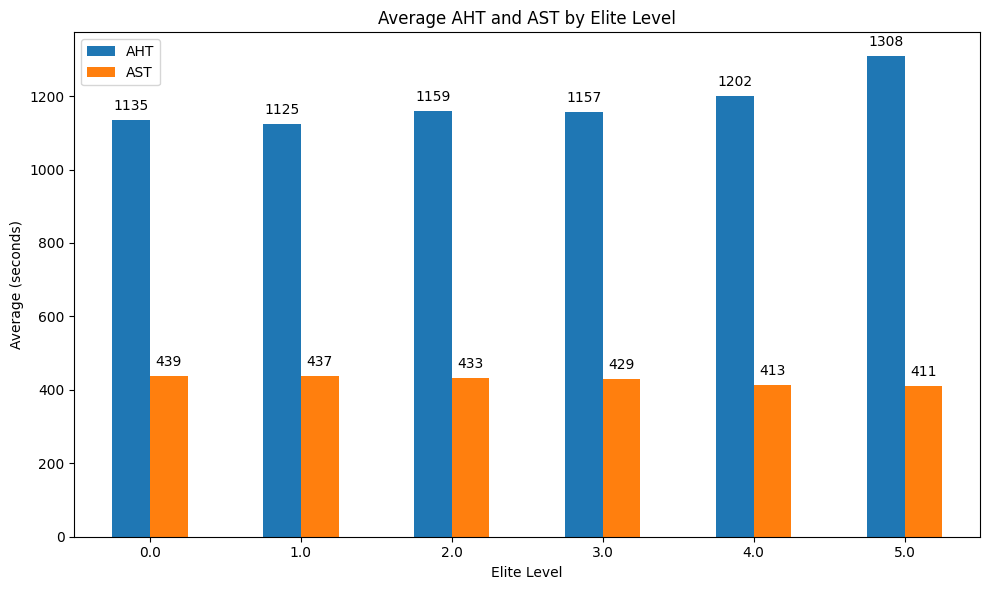

Unique Elite Levels: [ 4. nan  2.  0.  5.  1.  3.]


In [ ]:
import matplotlib.pyplot as plt

# Get unique elite levels
unique_elite_levels = merged_df2['elite_level_code'].unique()

# Calculate average AHT and AST for each elite level
elite_level_aht_ast = merged_df2.groupby('elite_level_code')[['AHT', 'AST']].mean()

# Plot the data
ax = elite_level_aht_ast.plot(kind='bar', figsize=(10, 6))
plt.title('Average AHT and AST by Elite Level')
plt.xlabel('Elite Level')
plt.ylabel('Average (seconds)')
plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels if needed
plt.tight_layout()

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Print unique elite levels
print("Unique Elite Levels:", unique_elite_levels)

In [ ]:
call_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,AST
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,2280.0,420.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,900.0,180.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1620.0,480.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,720.0,300.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,600.0


In [ ]:
agent_id_counts = call_df['agent_id'].value_counts()
print(agent_id_counts)

agent_id
251287    486
594957    481
963118    471
757349    460
376343    452
         ... 
737543      2
771538      2
161354      2
506130      1
547592      1
Name: count, Length: 383, dtype: int64


#Number of calls handled by each Agent

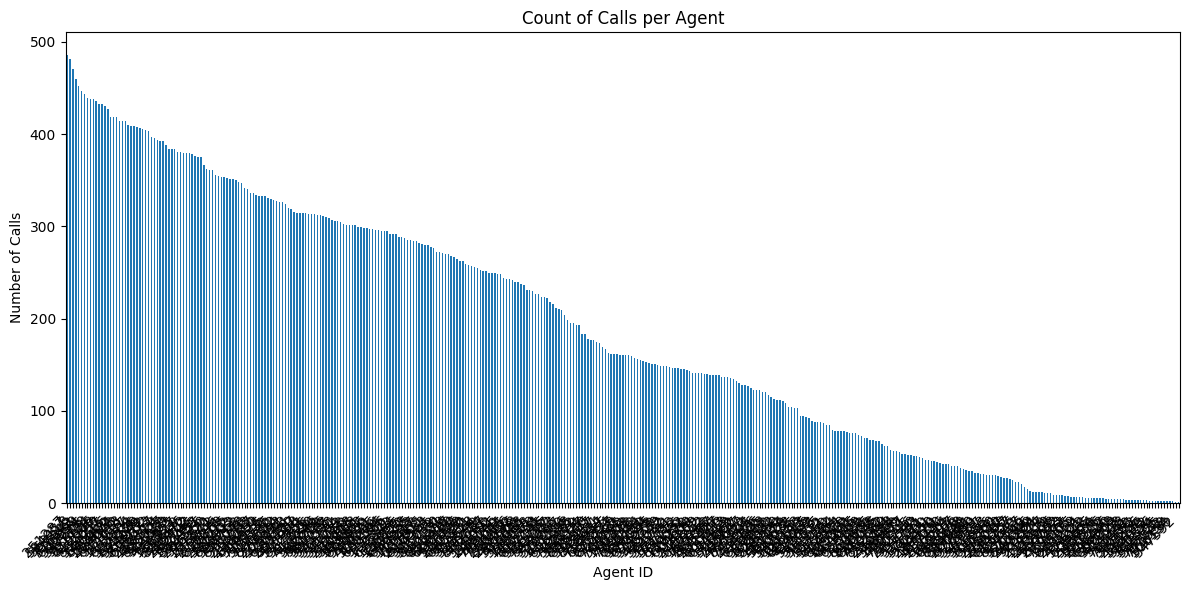

In [ ]:
import matplotlib.pyplot as plt

agent_id_counts = call_df['agent_id'].value_counts()

# Plotting the agent ID counts
plt.figure(figsize=(12, 6))
agent_id_counts.plot(kind='bar')
plt.title('Count of Calls per Agent')
plt.xlabel('Agent ID')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [ ]:
call_df['call_date'] = pd.to_datetime(call_df['call_start_datetime']).dt.date

#Number of calls handled by each agent per day vs AHT

In [ ]:
calls_per_day_agent = call_df.groupby(['agent_id', pd.to_datetime(call_df['call_date']).dt.date])['call_id'].count()
print("\nCalls per day by agent:")
print(calls_per_day_agent)

# 2. Total calls per agent ID
total_calls_per_agent = call_df.groupby('agent_id')['call_id'].count()
print("\nTotal calls per agent ID:")
print(total_calls_per_agent)


Calls per day by agent:
agent_id  call_date 
102574    2024-08-31     2
103651    2024-08-03    18
          2024-08-04    21
          2024-08-10    19
          2024-08-11    23
                        ..
993862    2024-08-27    22
          2024-08-28    17
          2024-08-29    17
          2024-08-30    14
          2024-08-31     8
Name: call_id, Length: 5443, dtype: int64

Total calls per agent ID:
agent_id
102574      2
103651    298
106000    113
107876      6
112609     11
         ... 
981776    309
981779    227
982131    270
992521     46
993862    298
Name: call_id, Length: 383, dtype: int64


In [ ]:
# 1. Calls and average AST per day by agent
calls_aht_per_day_agent = call_df.groupby(['agent_id', pd.to_datetime(call_df['call_date']).dt.date])[['call_id', 'AHT']].agg({'call_id': 'count', 'AHT': 'mean'})
calls_aht_per_day_agent.rename(columns={'call_id': 'call_count'}, inplace=True)  # Rename 'call_id' to 'call_count'
print("\nCalls and average AHT per day by agent:")
print(calls_aht_per_day_agent)


Calls and average AHT per day by agent:
                     call_count          AHT
agent_id call_date                          
102574   2024-08-31           2  4080.000000
103651   2024-08-03          18  1016.666667
         2024-08-04          21  1168.571429
         2024-08-10          19  1278.947368
         2024-08-11          23  1134.782609
...                         ...          ...
993862   2024-08-27          22  1112.727273
         2024-08-28          17   935.294118
         2024-08-29          17  1189.411765
         2024-08-30          14  1315.714286
         2024-08-31           8  1807.500000

[5443 rows x 2 columns]


In [ ]:
merged_df3 = call_df.merge(reason_df, on='call_id', how='inner')

In [ ]:
merged_df3

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,AST,call_hour,primary_call_reason
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,2280.0,420.0,23,voluntary cancel
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,900.0,180.0,0,booking
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1620.0,480.0,23,irrops
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,720.0,300.0,0,upgrade
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,600.0,0,seating
...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,960.0,360.0,23,mileage plus
66649,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,2220.0,540.0,23,post flight
66650,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,660.0,180.0,23,upgrade
66651,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,720.0,360.0,23,upgrade
